In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

In [2]:
df = pd.read_csv('files_for_lab/customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
y = df['Churn']
x = df.select_dtypes(np.number)
x

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


C:\Users\Flo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tenure'>

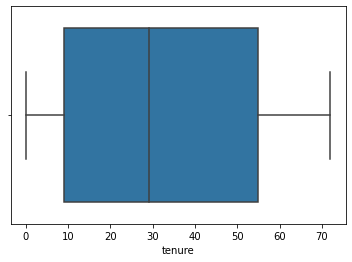

In [5]:
sns.boxplot(x['tenure'])

C:\Users\Flo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyCharges'>

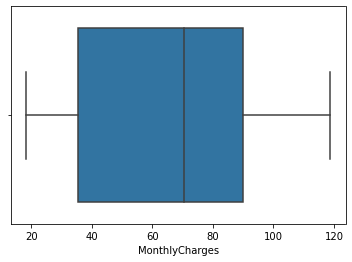

In [6]:
sns.boxplot(x['MonthlyCharges'])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [8]:
model = LogisticRegression(random_state=42, max_iter=1000)

model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [9]:
model.score(x_test, y_test)

0.7936583057264552

In [10]:
predictions = model.predict(x_test)
predictions

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [11]:
confusion_matrix(y_test, predictions)

array([[1420,  119],
       [ 317,  257]], dtype=int64)

<AxesSubplot:>

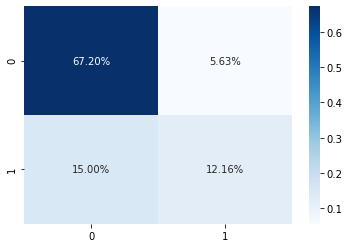

In [12]:
cf_matrix1 = confusion_matrix(y_test, predictions, normalize='all')
sns.heatmap(cf_matrix1, annot=True, fmt='.2%', cmap='Blues')

In [13]:
sm = SMOTE(random_state=42)
# x_train_res, x_test_res, y_train_res, y_test_res = train_test_split(x_res,y_res, test_size=0.3, random_state=42)
x_res, y_res = sm.fit_resample(x_train, y_train)

model.fit(x_res, y_res)
model.score(x_test, y_test)

0.7340274491244676

In [14]:
predictions_res = model.predict(x_test)
predictions_res

array(['No', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

In [15]:
confusion_matrix(y_test, predictions_res)

array([[1125,  414],
       [ 148,  426]], dtype=int64)

<AxesSubplot:>

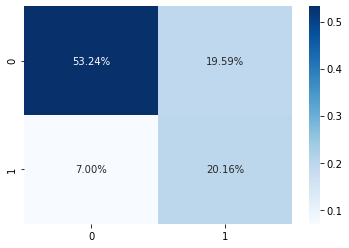

In [16]:
cf_matrix2 = confusion_matrix(y_test, predictions_res, normalize='all')
sns.heatmap(cf_matrix2, annot=True, fmt='.2%', cmap='Blues')

In [17]:
tl = TomekLinks()
x_tom, y_tom = tl.fit_resample(x_train, y_train)
# x_train_tom, x_test_tom, y_train_tom, y_test_tom = train_test_split(x_tom,y_tom, test_size=0.3, random_state=42)
model.fit(x_tom, y_tom)
model.score(x_test, y_test)

0.7851396119261713

In [18]:
predictions_tom = model.predict(x_test)
predictions_tom

array(['No', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

In [19]:
confusion_matrix(y_test, predictions_tom)

array([[1360,  179],
       [ 275,  299]], dtype=int64)

<AxesSubplot:>

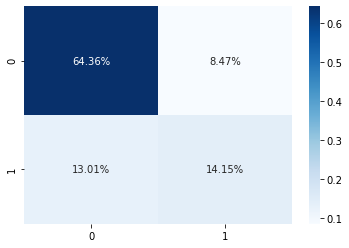

In [20]:
cf_matrix3 = confusion_matrix(y_test, predictions_tom, normalize='all')
sns.heatmap(cf_matrix3, annot=True, fmt='.2%', cmap='Blues')

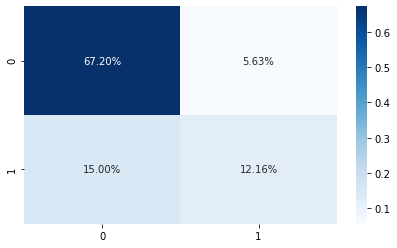

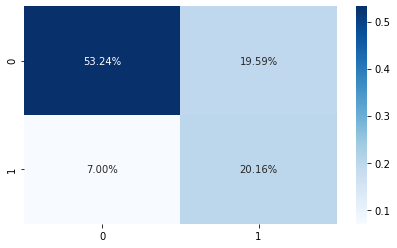

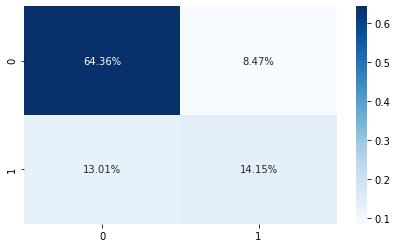

In [21]:
l = [cf_matrix1,cf_matrix2,cf_matrix3]

for i in l:
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7,4))
    sns.heatmap(i, annot=True, fmt='.2%', cmap='Blues')